# Comparing two means

Predictor is a binary grouping variable and outcome is continuous, interval or ratio scale.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## One-sample $z$-test

Not useful in practice, but for explanatory purposes.

### The inference problem

To introduce the idea behind the $z$-test, let’s use a simple example. A friend of mine, Dr Zeppo, grades his introductory statistics class on a curve. Let’s suppose:
- the average grade in his class is 67.5
- the standard deviation is 9.5.

Of his many hundreds of students, it turns out that 20 of them also take psychology classes. Out of curiosity, I find myself wondering: do the psychology students tend to get the same grades as everyone else (i.e., mean 67.5) or do they tend to score higher or lower? He emails me the zeppo.csv file, which I use to pull up the grades of those students,

In [51]:
# df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/zeppo.csv")
df = pd.read_csv('data/zeppo.csv')
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


In [52]:
df.grades.mean()

72.3

The sample mean $\bar{X} = 72.3$ is higher than $\mu = 67.5$, but is that chance given the small sample size $N=20$?

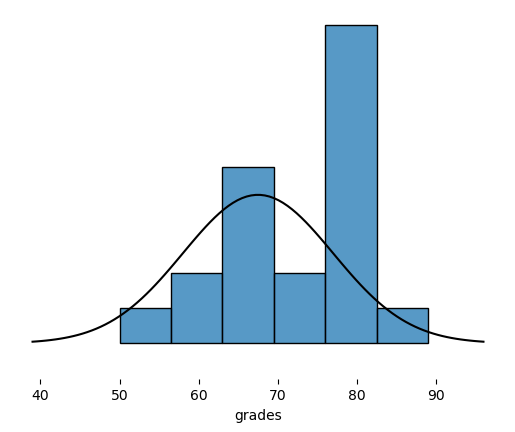

In [53]:
mu = 67.5
sigma = 9.5
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = 100*stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df.grades)
ax2 = sns.lineplot(x=x, y=y, color='black')
plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

# plt.close()
# from myst_nb import glue
# glue("zeppo-fig", fig, display=True)

### Construct the hypothesis test

$$\begin{split}
\begin{array}{ll}
H_0: & \mu = 67.5 \\
H_1: & \mu \neq 67.5
\end{array}
\end{split}$$

We also know that the grades are normally distributed and the true standard deviation $\sigma=9.5$.

Text(-1.2, 23.6, '$\\sigma = \\sigma_0$')

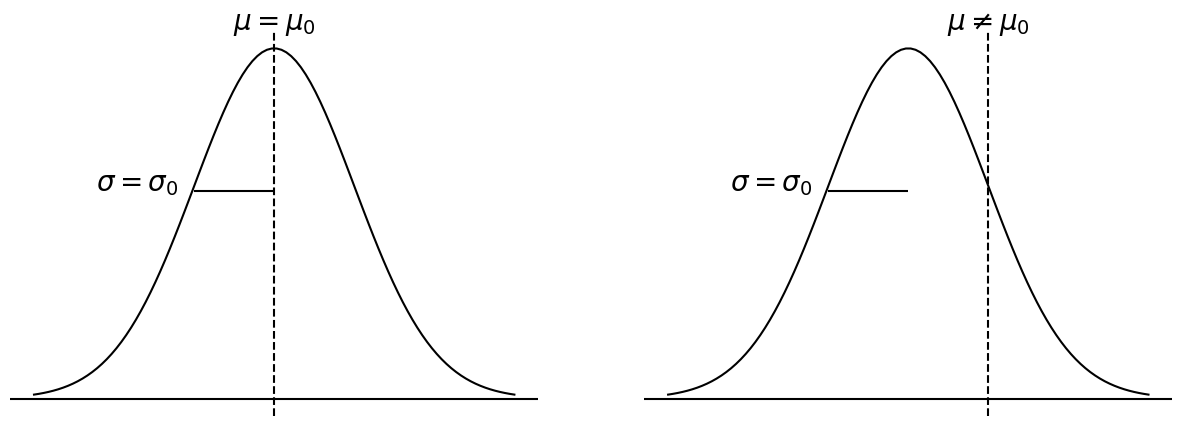

In [54]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=x,y=y, color='black', ax=axes[0])
sns.lineplot(x=x,y=y, color='black', ax=axes[1])

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)

axes[0].axhline(y=0, color='black')
axes[0].axvline(x=mu, color='black', linestyle='--')

axes[1].axhline(y=0, color='black')
axes[1].axvline(x=mu + sigma, color='black', linestyle='--')

axes[0].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')
axes[1].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')


axes[0].text(mu,42, r'$\mu = \mu_0$', size=20, ha="center")
axes[1].text(mu + sigma, 42, r'$\mu \neq \mu_0$', size=20, ha="center")

axes[0].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")
axes[1].text(mu-sigma - 0.2, 23.6, r'$\sigma = \sigma_0$', size=20, ha="right")

Fig. 14.2 Graphical illustration of the null and alternative hypotheses assumed by the one sample $z$-test (the two sided version, that is). The null and alternative hypotheses both assume that the population distribution is normal, and additionally assumes that the population standard deviation is known (fixed at some value $\sigma$). The null hypothesis (left) is that the population mean $\mu$ is equal to some specified value $\mu_0$. The alternative hypothesis is that the population mean differs from this value, $\mu \neq \mu_0$

We need to calculate $\bar{X} - \mu_0$

Standard error of the mean:

$$\text{SE}({\bar{X}}) = \frac{\sigma}{\sqrt{N}}$$

In other words, if the null hypothesis is true then the sampling distribution of the mean can be written as follows:

$$\bar{X} \sim \text{Normal}(\mu_0,\text{SE}({\bar{X}}))$$

To convert the sample mean $\bar{X}$ to the standard $z$-score

$$z_{\bar{X}} = \frac{\bar{X} - \mu_0}{\text{SE}({\bar{X}})}$$

or

$$z_{\bar{X}} =  \frac{\bar{X} - \mu_0}{\sigma / \sqrt{N}}$$

Regardless of what the population parameters for the raw scores actually are, the 5% critical regions for $z$-test are always the same

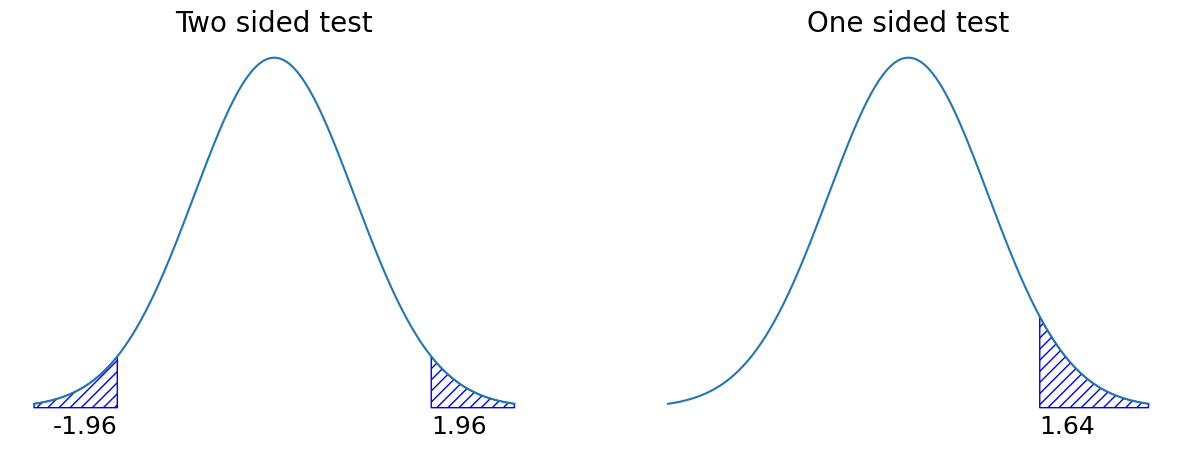

In [55]:
mu = 0
sigma = 1

x = np.arange(-3,3,0.001)
y = stats.norm.pdf(x, mu, sigma)


fig, (ax0, ax1) = plt.subplots(1, 2, sharey = True, figsize=(15, 5))


# Two-sided test
crit = 1.96
p_lower = x[x<crit*-1]
p_upper = x[x>crit]

ax0.plot(x, y)

ax0.fill_between(p_lower, 0, stats.norm.pdf(p_lower, mu, sigma),color="none",hatch="///",edgecolor="b")
ax0.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")
ax0.set_title("Two sided test", size = 20)
ax0.text(-1.96,-.03, '-1.96', size=18, ha="right")
ax0.text(1.96,-.03, '1.96', size=18, ha="left")

# One-sided test
crit = 1.64
p_upper = x[x>crit]

ax1.plot(x, y)
ax1.set_title("One sided test", size = 20)
ax1.text(1.64,-.03, '1.64', size=18, ha="left")
ax1.fill_between(p_upper, 0, stats.norm.pdf(p_upper, mu, sigma), color="none",hatch="///",edgecolor="b")

ax0.set_frame_on(False)
ax1.set_frame_on(False)

ax0.get_yaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)

### Example

In [56]:
sample_mean = df.grades.mean()
sample_mean

72.3

In [57]:
sd_true = 9.5
mu_null = 67.5
N = len(df.grades)
N

20

In [58]:
import math
sem_true = sd_true / math.sqrt(N)
sem_true

2.1242645786248002

In [59]:
z_score = (sample_mean - mu_null) / sem_true
z_score

2.259605535157681

In [60]:
from statistics import NormalDist
lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = upper_area + lower_area
p_value

0.023845743764939864

### Reporting

>With a mean grade of 73.2 in the sample of psychology students, and assuming a true population standard deviation of 9.5, we can conclude that the psychology students have significantly different statistics scores to the class average ($z = 2.26,N=20,p<.05$).

### Assumptions of $z$-test

- Normality
- Independence
- Known standard deviation

## One-sample $t$-test

Removing the unrealistic assumption that the different data sets have the same standard deviation.

Instead, we can use the estimated standard deviation, but must alter the formula.

Text(-1.2, 23.6, '$\\sigma = ??$')

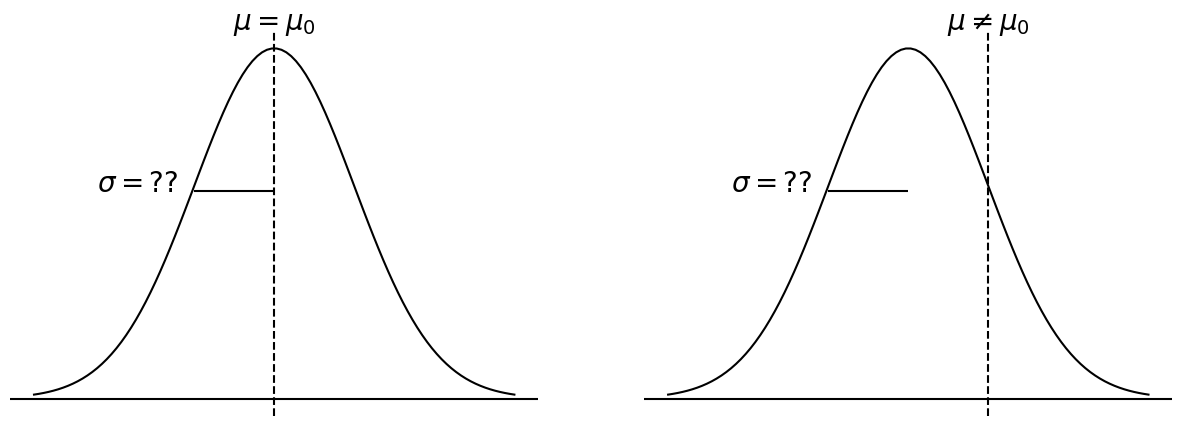

In [61]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=x,y=y, color='black', ax=axes[0])
sns.lineplot(x=x,y=y, color='black', ax=axes[1])

axes[0].set_frame_on(False)
axes[1].set_frame_on(False)
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)


axes[0].axhline(y=0, color='black')
axes[0].axvline(x=mu, color='black', linestyle='--')

axes[1].axhline(y=0, color='black')
axes[1].axvline(x=mu + sigma, color='black', linestyle='--')

axes[0].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')
axes[1].hlines(y=23.6, xmin = mu-sigma, xmax = mu, color='black')


axes[0].text(mu,42, r'$\mu = \mu_0$', size=20, ha="center")
axes[1].text(mu + sigma, 42, r'$\mu \neq \mu_0$', size=20, ha="center")

axes[0].text(mu-sigma - 0.2, 23.6, r'$\sigma = ??$', size=20, ha="right")
axes[1].text(mu-sigma - 0.2, 23.6, r'$\sigma = ??$', size=20, ha="right")

Fig. 14.4 Graphical illustration of the null and alternative hypotheses assumed by the (two sided) one sample $t$-test. Note the similarity to the $z$-test. The null hypothesis is that the population mean $\mu$ is equal to some specified value $\mu_0$, and the alternative hypothesis is that it is not. Like the $z$-test, we assume that the data are normally distributed; but we do not assume that the population standard deviation $\sigma$ is known in advance.

### $t$-test

$$t = \frac{\bar{X} - \mu}{\hat{\sigma}/\sqrt{N} }$$

In this case, the sampling distribution is a $t$-distribution with $N-1$ degrees of freedom.

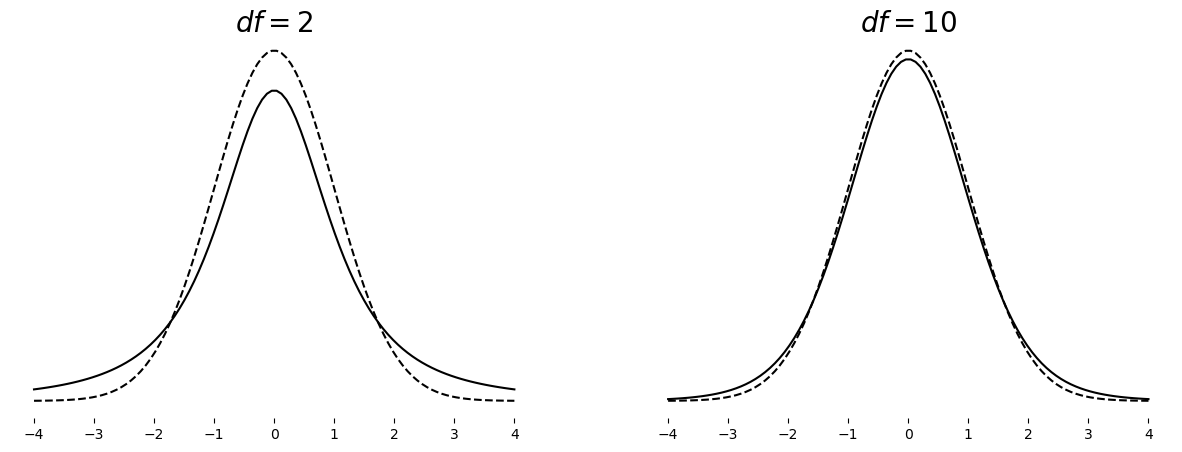

In [62]:
mu = 0
variance = 1
sigma = np.sqrt(variance)


x = np.linspace(-4, 4, 100)
y_norm = stats.norm.pdf(x, mu, sigma)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))


# t-distribution with 2 degrees of freedom
y_t = stats.t.pdf(x, 2)
sns.lineplot(x = x, y = y_norm, color = 'black', linestyle='--', ax = axes[0])
sns.lineplot(x = x, y = y_t, color = 'black', ax = axes[0])

# t-distribution with 10 degrees of freedom
y_t = stats.t.pdf(x, 10)
sns.lineplot(x = x, y = y_norm, color = 'black', linestyle='--', ax = axes[1])
sns.lineplot(x = x, y = y_t, color = 'black', ax = axes[1])

axes[0].text(0, 0.42, r'$df = 2$', size=20, ha="center")
axes[1].text(0, 0.42, r'$df = 10$', size=20, ha="center")


#sns.despine()
axes[0].get_yaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[0].set_frame_on(False)
axes[1].set_frame_on(False)

Fig. 14.5 The $t$distribution with 2 degrees of freedom (left) and 10 degrees of freedom (right), with a standard normal distribution (i.e., mean 0 and std dev 1) plotted as dotted lines for comparison purposes. Notice that the
distribution has heavier tails (higher kurtosis) than the normal distribution; this effect is quite exaggerated when the degrees of freedom are very small, but negligible for larger values. In other words, for large $df$ the $t$ distribution is essentially identical to a normal distribution.

In [63]:
from scipy.stats import ttest_1samp
t, p = ttest_1samp(a=df.grades, popmean=67.5)
t, p

(2.25471286700693, 0.03614521878144544)

In [64]:
N = len(df.grades)
degfree = N-1
sample_mean = df.grades.mean()
print(f'Sample mean: {sample_mean}\n Degrees of freedom: {degfree}')

Sample mean: 72.3
 Degrees of freedom: 19


To find the confidence interval, we need to:
1. set a confidence level
2. know the sample mean
3. know the degrees of freedom for the test
4. know the standard error of the sample


In [65]:
confidence_level = 0.95
dof = len(df.grades) - 1
sample_mean = df.grades.mean()
sample_se = df.grades.sem()

confidence_interval = stats.t.interval(
    confidence_level, dof, sample_mean, sample_se
)
confidence_interval

(67.84421513791415, 76.75578486208585)

### Report

>With a mean grade of 72.3, the psychology students scored slightly higher than the average grade of 67.5 ($t(19) = 2.25,p<.05,\text{CI}_{95} = [67.8, 76.8]$).

### The easy way

In [66]:
from pingouin import ttest
ttest(df.grades, 67.5).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.25,19,two-sided,0.04,"[67.84, 76.76]",0.5,1.795,0.57


### Assumptions of one sample $t$-test

- Normality
- Independence

## Independent samples $t$-test (Student test)

Do two groups of data have the same population mean?

In the example, the grades of students with different tutors are compared to see if one is better, ie has a higher mean. Anastasia has 15 students and Bernadette has 18.

In [67]:
# df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/harpo.csv")
df = pd.read_csv('data/harpo.csv')
df.head()

,grade,tutor
0,65,Anastasia
1,72,Bernadette
2,66,Bernadette
3,74,Anastasia
4,73,Anastasia


In [68]:
harpo_summary = pd.DataFrame(
    {
        'students': ["Anastasia's students", "Bernadette's students"],
        'mean': [df.loc[df.tutor == 'Anastasia']['grade'].mean().round(2),
                 df.loc[df.tutor == 'Bernadette']['grade'].mean().round(2)],
        'std dev': [df.loc[df.tutor == 'Anastasia']['grade'].std(),
                 df.loc[df.tutor == 'Bernadette']['grade'].std()],
        'N': [len(df.loc[df.tutor == 'Anastasia']),
              len(df.loc[df.tutor == 'Bernadette'])]
    }
)
harpo_summary

,students,mean,std dev,N
0,Anastasia's students,74.53,8.998942,15
1,Bernadette's students,69.06,5.774918,18


Text(0.5, 1.0, 'Bernadette')

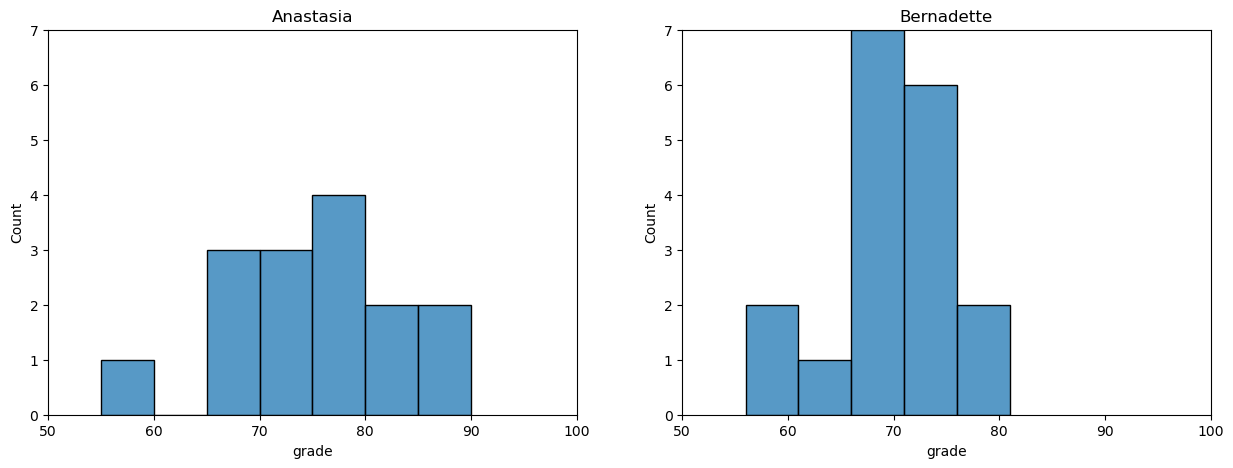

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade'])
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade'])

sns.histplot(Anastasia['grade'], ax = axes[0], binwidth = 5)
sns.histplot(Bernadette['grade'], ax = axes[1], binwidth = 5)

axes[0].set_xlim(50,100)
axes[1].set_xlim(50,100)

axes[0].set_ylim(0,7)
axes[1].set_ylim(0,7)

axes[0].set_title('Anastasia')
axes[1].set_title('Bernadette')

<Axes: xlabel='tutor', ylabel='grade'>

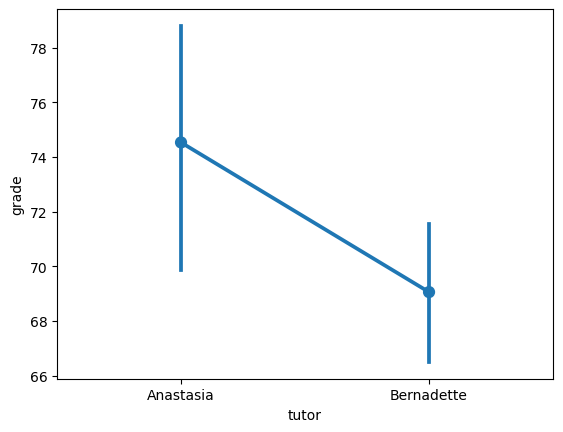

In [70]:
sns.pointplot(x = 'tutor', y = 'grade', data = df)

We expect $\bar{X}_1 - \bar{X}_2$ to be close to 0. The $t$-statistic is

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\text{SE}}$$

### Pooled estimate of the standard deviation

In the original Student $t$-test we assume both groups have the same standard deviation. To do so, use a weighted average of the variance estimates:

$$\begin{split}
\begin{array}{rcl}
w_1 &=& N_1 - 1\\
w_2 &=& N_2 - 1
\end{array}
\end{split}$$

$$\hat\sigma^2_p = \frac{w_1 {\hat\sigma_1}^2 + w_2 {\hat\sigma_2}^2}{w_1 + w_2}$$

$$\hat\sigma_p = \sqrt{\frac{w_1 {\hat\sigma_1}^2 + w_2 {\hat\sigma_2}^2}{w_1 + w_2}}$$

Alternatively:

$$X_{ik} - \bar{X}_k$$

$$\frac{\sum_{ik} \left( X_{ik} - \bar{X}_k \right)^2}{N}$$

$$\hat\sigma^2_p = \frac{\sum_{ik} \left( X_{ik} - \bar{X}_k \right)^2}{N -2}$$

### Standard Error

$$\text{SE}({\bar{X}_1 - \bar{X}_2}) = \hat\sigma \sqrt{\frac{1}{N_1} + \frac{1}{N_2}}$$

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\text{SE}({\bar{X}_1 - \bar{X}_2})}$$

In [71]:
harpo_wide = pd.DataFrame({
    'Anastasia': df.loc[df['tutor'] == 'Anastasia']['grade'],
    'Bernadette': df.loc[df['tutor'] == 'Bernadette']['grade']
})
harpo_wide.head()

,Anastasia,Bernadette
0,65.0,NaN
1,NaN,72.0
2,NaN,66.0
3,74.0,NaN
4,73.0,NaN


In [72]:
from pingouin import ttest
ttest(harpo_wide['Anastasia'], harpo_wide['Bernadette'], 
      correction=False) # False to use Student's t-test rather than Welch independent samples t-test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.115432,31,two-sided,0.042529,"[0.2, 10.76]",0.739561,1.755,0.53577


In [73]:
harpo_wide.describe()

,Anastasia,Bernadette
count,15.000000,18.000000
mean,74.533333,69.055556
std,8.998942,5.774918
min,55.000000,56.000000
25%,69.000000,66.250000
50%,76.000000,69.000000
75%,79.000000,73.000000
max,90.000000,79.000000


### Report

>The mean grade in Anastasia’s class was 74.5% (std dev = 9.0), whereas the mean in Bernadette’s class was 69.1% (std dev = 5.8). A Student’s independent samples $t$-test showed that this 5.4% difference was significant ($t(31)=2.1,p \lt .05$), suggesting that a genuine difference in learning outcomes has occurred.

### Assumptions

- Normality
- Independence
- Homoscedasticity

## Independent samples $t$-test (Welch test)

Does not assume homoscedasticity.

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\text{SE}({\bar{X}_1 - \bar{X}_2})}$$

$$\text{SE}({\bar{X}_1 - \bar{X}_2}) = \sqrt{ \frac{{\hat{\sigma}_1}^2}{N_1} + \frac{{\hat{\sigma}_2}^2}{N_2} }$$

$$\text{df} = \frac{ ({\hat{\sigma}_1}^2 / N_1 + {\hat{\sigma}_2}^2 / N_2)^2 }{  ({\hat{\sigma}_1}^2 / N_1)^2 / (N_1 -1 )  + ({\hat{\sigma}_2}^2 / N_2)^2 / (N_2 -1 ) }$$

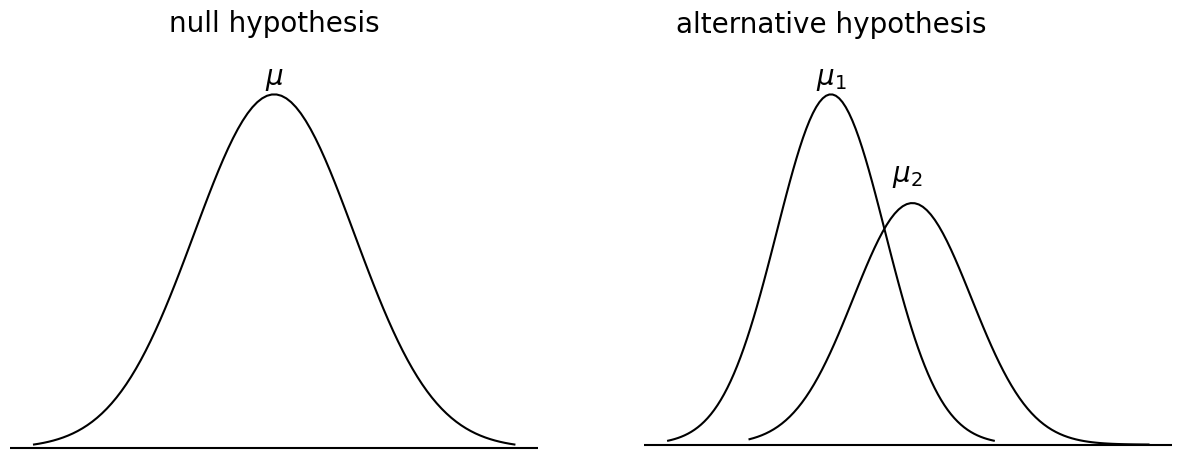

In [74]:
mu1 = 0
sigma1 = 1
mu2 = 2
sigma2 = 1.45

x1 = np.linspace(mu1 - 4*sigma, mu1 + 4*sigma1, 100)
y1 = 100* stats.norm.pdf(x1, mu1, sigma1)
x2 = np.linspace(mu2 - 4*sigma, mu2 + 4*sigma2, 100)
y2 = 100* stats.norm.pdf(x2, mu2, sigma2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


sns.lineplot(x=x,y=y, color='black', ax = ax1)

sns.lineplot(x=x,y=y, color='black', ax = ax2)
sns.lineplot(x=x2,y=y2, color='black', ax = ax2)

ax1.text(0, 47, 'null hypothesis', size=20, ha="center")
ax2.text(0, 47, 'alternative hypothesis', size=20, ha="center")

ax1.text(0, 41, r'$\mu$', size=20, ha="center")
ax2.text(0, 41, r'$\mu_1$', size=20, ha="center")
ax2.text(1.50, 30, r'$\mu_2$', size=20, ha="left")

ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.axhline(y=0, color='black')
ax2.axhline(y=0, color='black')

Fig. 14.9 Graphical illustration of the null and alternative hypotheses assumed by the Welch $t$-test. Like the Student test we assume that both samples are drawn from a normal population; but the alternative hypothesis no longer requires the two populations to have equal variance

In [75]:
ttest(harpo_wide['Anastasia'], harpo_wide['Bernadette'], correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.034187,23.024806,two-sided,0.05361,"[-0.09, 11.05]",0.739561,1.556,0.53577


## Paired-samples $t$-test

When the same subjects are tested at different times or under different conditions.

Compare the results of an initial test and a subsequent test in a class to see if grades improved.

In [76]:
# df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/chico.csv")
df = pd.read_csv('data/chico.csv')
df.head()

,id,grade_test1,grade_test2
0,student1,42.9,44.6
1,student2,51.8,54.0
2,student3,71.7,72.3
3,student4,51.6,53.4
4,student5,63.5,63.8


In [77]:
df.describe()

,grade_test1,grade_test2
count,20.000000,20.000000
mean,56.980000,58.385000
std,6.616137,6.405612
min,42.900000,44.600000
25%,51.750000,53.100000
50%,57.700000,59.700000
75%,62.050000,63.050000
max,71.700000,72.300000


While there is improvement, the large standard deviation suggests that the improvement could be just random.

<Axes: >

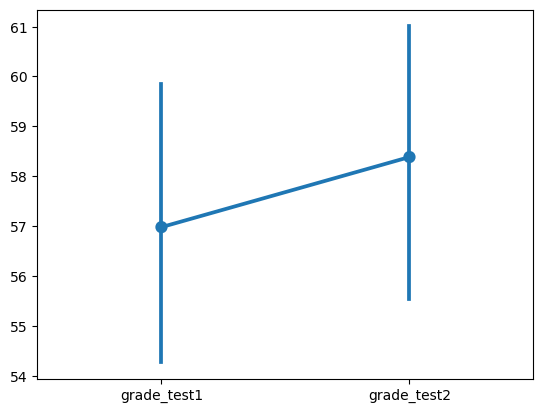

In [78]:
sns.pointplot(data=df)

But a scatterplot shows differently

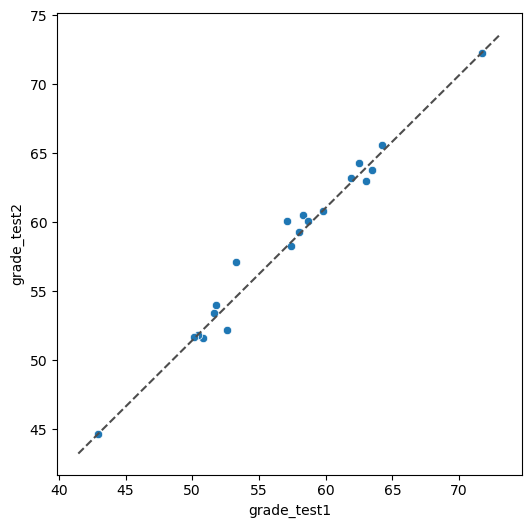

In [79]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(data = df, x='grade_test1', y='grade_test2', ax = ax)

ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

ax2.title.set_text('B')


Most of the data points are above the line, suggesting that most of the students improved.

In [80]:
df['improvement'] = df.grade_test2-df.grade_test1

<Axes: xlabel='improvement', ylabel='Count'>

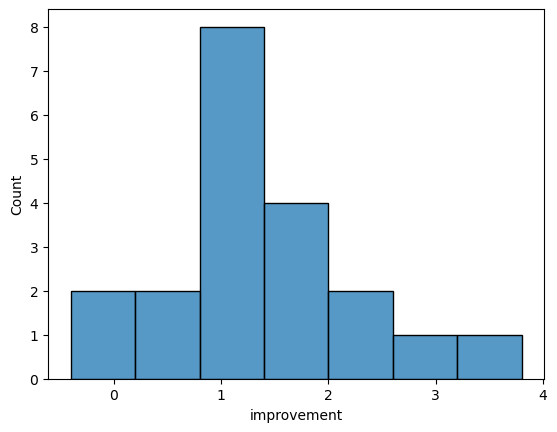

In [81]:
sns.histplot(data=df, x='improvement')

In [82]:
data = df.improvement
stats.t.interval(
    confidence=0.95,
    df=len(data)-1,
    loc=np.mean(data),
    scale=stats.sem(data)
    )

(0.9508686092602991, 1.8591313907397005)

we see that it is 95% certain that the true (population-wide) average improvement would lie between 0.95% and 1.86%

### Paired samples $t$-test

A one-sample test run on a "difference" variable.

$$D_{i} = X_{i1} - X_{i2}$$

$$
\begin{split}
\begin{array}{ll}
H_0: & \mu_D = 0  \\
H_1: & \mu_D \neq 0
\end{array}
\end{split}
$$

$$t = \frac{\bar{D}}{\text{SE}({\bar{D}})}$$

$$t = \frac{\bar{D}}{\hat\sigma_D / \sqrt{N}}$$

Degrees of freedeom $N-1$

In [83]:
ttest(df.improvement, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",1.447952,5991.577,0.999984


Creating the difference variable isn't necessary.

In [84]:
ttest(df.grade_test2, df.grade_test1, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.475436,19,two-sided,0.000003,"[0.95, 1.86]",0.215765,5991.577,0.150446


This confirms the average improvement of 1.4% which is significantly different from 0 ($t(19)=6.48, p \lt .001$).

## One-sided tests

When only interested in change in one direction but not the other. For example, testing for improvement only rather than difference in general.

In [85]:
df = pd.read_csv("data/zeppo.csv")
ttest(df.grades, 67.5, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.254713,19,greater,0.018073,"[68.62, inf]",0.504169,3.59,0.701407


In [86]:
ttest(df.grades, 67.5)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.254713,19,two-sided,0.036145,"[67.84, 76.76]",0.504169,1.795,0.571446


In [87]:
df = pd.read_csv("data/harpo.csv")

# create two new variables for the grades from each tutor's students
Anastasia = pd.DataFrame(df.loc[df['tutor'] == 'Anastasia']['grade'])
Bernadette = pd.DataFrame(df.loc[df['tutor'] == 'Bernadette']['grade'])

# run an independent samples t-test
from scipy import stats

print(f'Two-sided: {stats.ttest_ind(Anastasia, Bernadette, equal_var = True)}')
print(f"One-sided, Anastasia first: {stats.ttest_ind(Anastasia, Bernadette, equal_var = True, alternative = 'greater')}")
print(f"One-sided, Bernadette first: {stats.ttest_ind(Bernadette, Anastasia, equal_var = True, alternative = 'greater')}")

Two-sided: TtestResult(statistic=array([2.11543239]), pvalue=array([0.04252949]), df=array([31.]))
One-sided, Anastasia first: TtestResult(statistic=array([2.11543239]), pvalue=array([0.02126474]), df=array([31.]))
One-sided, Bernadette first: TtestResult(statistic=array([-2.11543239]), pvalue=array([0.97873526]), df=array([31.]))


In [88]:
from scipy.stats import ttest_rel
import pandas as pd
from scipy.stats import ttest_rel

df = pd.read_csv("data/chico.csv")

print('test 2 - test 1:', ttest_rel(df['grade_test2'], df['grade_test1'], alternative = 'greater'))
print('')
print('test 1 - test 2:', ttest_rel(df['grade_test1'], df['grade_test2'], alternative = 'greater'))         

test 2 - test 1: TtestResult(statistic=6.475436088339379, pvalue=1.660335028063474e-06, df=19)

test 1 - test 2: TtestResult(statistic=-6.475436088339379, pvalue=0.9999983396649719, df=19)


## Effect size

Cohen's $d$ is most commonly used, if ill-defined.

$$d = \frac{\text{(mean 1)} - \text{(mean 2)}}{\text{std dev}}$$

|d-value|rough interpretation|
|---|---|
|about 0.2|“small” effect|
|about 0.5|“moderate” effect|
|about 0.8|“large” effect|

### Cohen's $d$ from one sample

$$d = \frac{\bar{X} - \mu_0}{\hat{\sigma}}$$

In [89]:
df = pd.read_csv("data/zeppo.csv")
d = (df.grades.mean()-67.5) / df.grades.std()
print(f"Cohen's d: {d}")

Cohen's d: 0.5041691240370937


### Cohen's $d$ from Student $t$ test

$$\delta = \frac{\mu_1 - \mu_2}{\sigma}$$

$$d = \frac{\bar{X}_1 - \bar{X}_2}{\hat{\sigma}_p}$$

This version is called Hedges' $g$ statistic. Alternatives include
- if one group represents "normal", can use Glass' $\Delta$
- if calculating effect size in the sample rather than in the population, can divide by $N$ instead of $N-2$


In [90]:
df = pd.read_csv("data/harpo.csv")

tutor1 = pd.DataFrame(df.loc[df['tutor']=='Anastasia']['grade'])
tutor2 = pd.DataFrame(df.loc[df['tutor']=='Bernadette']['grade'])

n1 = len(tutor1)
n2 = len(tutor2)

u1 = tutor1['grade'].mean()
u2 = tutor2['grade'].mean()

v1 = tutor1['grade'].var()
v2 = tutor2['grade'].var()

sp = np.sqrt(((n1-1)*v1 + (n2-1)*v2) / (n1 + n2-2))

d = (u1 - u2) / sp
print(f"Cohen's d: {round(d, 2)}")


Cohen's d: 0.74


### Cohen's $d$ from Welch test

Independent samples with (possibly) different variances.

$$\delta^\prime = \frac{\mu_1 - \mu_2}{\sigma^\prime}$$

$$\sigma^\prime = \sqrt{\displaystyle{\frac{ {\sigma_1}^2 + {\sigma_2}^2}{2}}}$$

$$d = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\displaystyle{\frac{ {\hat\sigma_1}^2 + {\hat\sigma_2}^2}{2}}}}$$

In [91]:
u1 = tutor1.grade.mean()
u2 = tutor2.grade.mean()

v1 = tutor1.grade.var()
v2 = tutor2.grade.var()

s = np.sqrt((v1 + v2)/2)

d = (u1 - u2) / s
print(f"Cohen's d: {round(d, 2)}")

Cohen's d: 0.72


### Cohen's $d$ from paired-samples test

Independent samples with (possibly) different variances.

To measure the effect size relative to the distribution of scores

$$d=\frac{\bar{D}}{\hat{\sigma}_D}$$

In [92]:
df = pd.read_csv("data/chico.csv")

difference = df.grade_test2 - df.grade_test1

mean_diff = np.mean(difference)
sd_diff = np.std(difference)

d = mean_diff / sd_diff
print(f"Cohen's d: {round(d, 2)}")

Cohen's d: 1.49


**To measure the effect size relative to the original variables:**

In [93]:
u1 = df.grade_test1.mean()
u2 = df.grade_test2.mean()

v1 = df.grade_test1.var()
v2 = df.grade_test2.var()

s = np.sqrt((v1 + v2)/2)
d = (u2 - u1) / s
print(f"Cohen's d: {round(d, 2)}")

Cohen's d: 0.22


## Checking normality of sample

### QQ plots

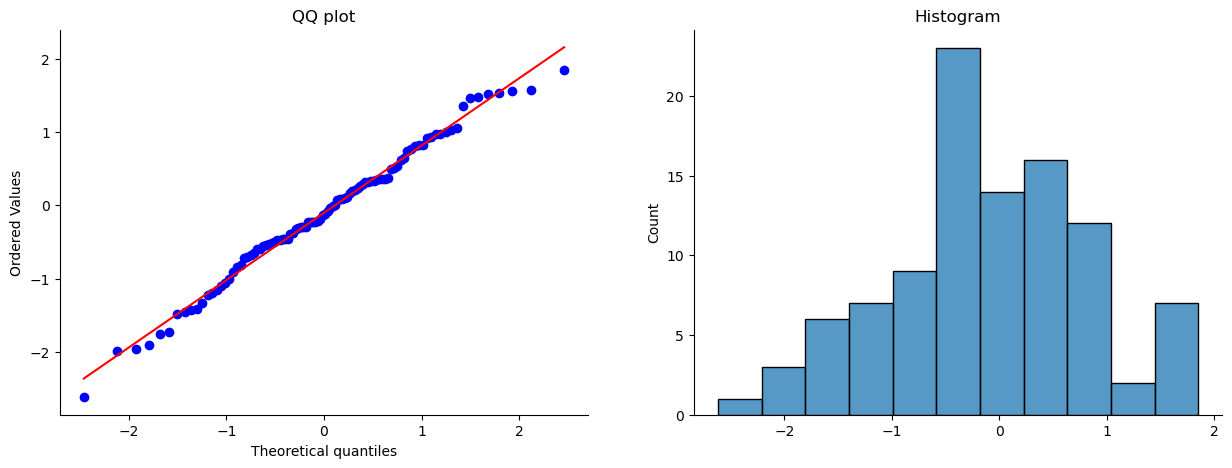

In [95]:
from scipy.stats import probplot

np.random.seed(42)
normal_data = np.random.normal(size=100)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(normal_data, dist="norm", plot = axes[0]);
sns.histplot(normal_data, axes=axes[1]);

# format the figures
titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

QQ plot (left) and histogram (right) of a normally distributed sample with 100 observations. The Shapiro-Wilk statistic associated with these data is $W=.99$, indicating that no significant departures from normality were detected ($p=.73$)

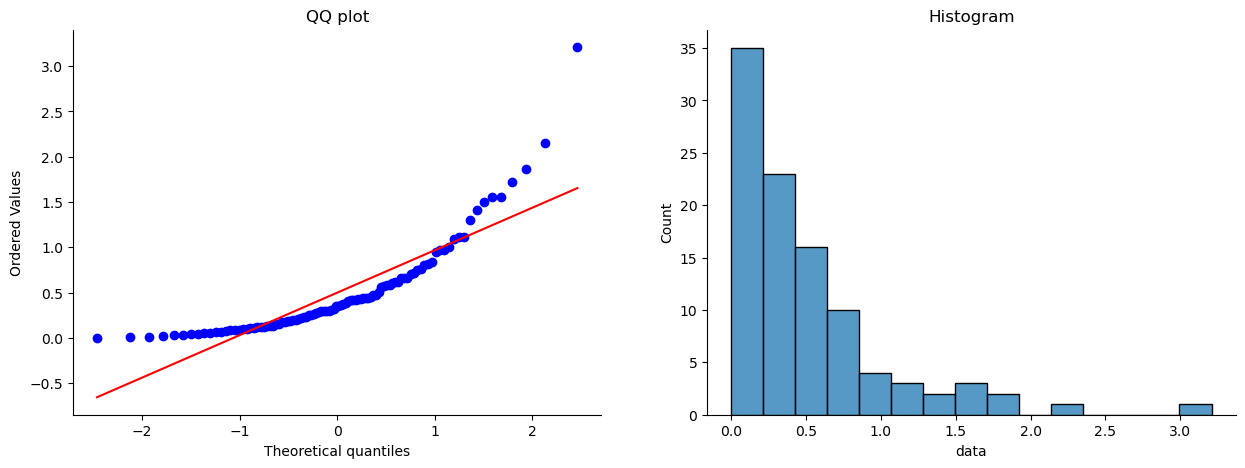

In [96]:
# df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/skewed_data.csv")
df = pd.read_csv("data/skewed_data.csv")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

probplot(df['data'], dist="norm", plot = axes[0])
sns.histplot(df['data'], axes=axes[1])

# format the figures
titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])

The skewness of these data of 100 observations is 1.94, and is reflected in a QQ plot that curves upwards. As a consequence, the Shapiro-Wilk statistic is $W=.80$, reflecting a significant departure from normality ($p \lt .001$).

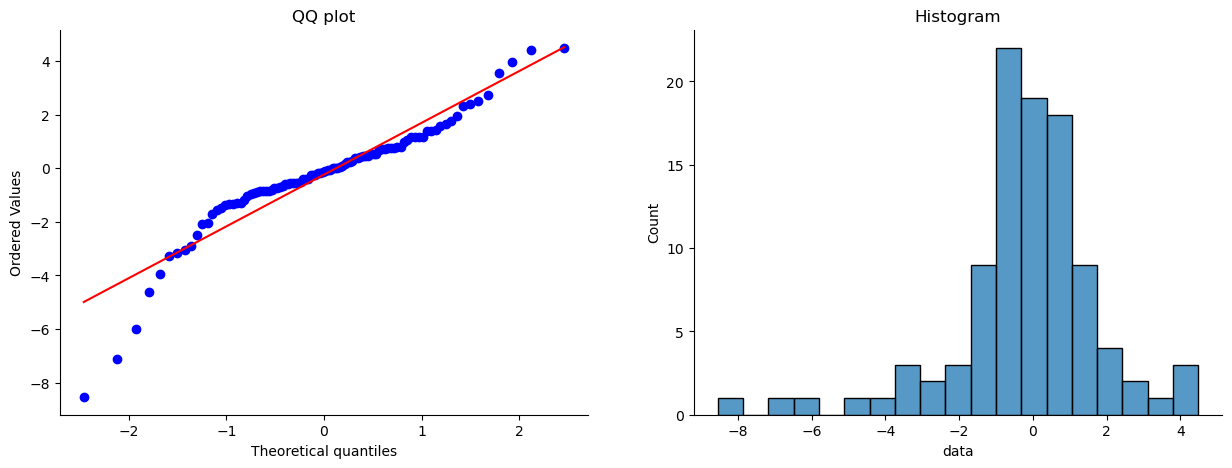

In [97]:
# df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/heavy_tailed_data.csv")
df = pd.read_csv("data/heavy_tailed_data.csv")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

qq = probplot(df['data'], dist="norm", plot = axes[0])
hist = sns.histplot(df['data'], axes=axes[1])

# format the figures
titles = ['QQ plot', 'Histogram']
for i, ax in enumerate(axes):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_title(titles[i])


Plots for a heavy tailed data set, again consisting of 100 observations. In this case, the heavy tails in the data produce a high kurtosis (2.80), and cause the QQ plot to flatten in the middle, and curve away sharply on either side. The resulting Shapiro-Wilk statistic is $W=.93$, again reflecting significant non-normality ($p \lt .001$).

### Wilcoxon tests for non-normal data

Does not assume normality. Less powerful than $t$-test. Uses a $W$ distribution.

#### 2 Sample

In [99]:
df = pd.read_csv("data/awesome2.csv")
df

,score_A,score_B
0,6.4,14.5
1,10.7,10.4
2,11.9,12.9
3,7.3,11.7
4,10.0,13.0


Tabulate group a scores and group b scores, check each cell where group a's scores are higher, count the results. Interpretations are like $t$-tests.

In [100]:
from scipy.stats import wilcoxon

w,p = wilcoxon(df.score_A, df.score_B)
w,p

(1.0, 0.125)

#### One sample

Calculate before vs after and test the difference.

In [101]:
df = pd.read_csv('data/happiness.csv')
df

,before,after,change
0,30,6,-24
1,43,29,-14
2,21,11,-10
3,24,31,7
4,23,17,-6
5,40,2,-38
6,29,31,2
7,56,21,-35
8,38,8,-30
9,16,21,5


In [102]:
w, p = wilcoxon(df.change)
w,p

(7.0, 0.037109375)